<a href="https://colab.research.google.com/github/Rambe01/HRDataAnalysis/blob/main/ProcessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies
!pip install shap scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap

# Load dataset
df = pd.read_csv("/content/Cleaned_HR_Data_Analysis.csv")

# Preview data
df.head()



,Employee ID,StartDate,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Date,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age
0,3427,20-Sep-19,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,...,1,2,3,15-Jul-23,Leadership Development,Internal,Failed,2,606.11,50
1,3428,11-Feb-23,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,...,2,1,5,12-Sep-22,Customer Service,External,Incomplete,4,673.02,58
2,3429,10-Dec-18,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,...,1,2,1,13-Aug-22,Leadership Development,External,Failed,2,413.28,27
3,3430,21-Jun-21,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,...,5,5,4,15-Dec-22,Project Management,External,Completed,3,663.78,23
4,3431,29-Jun-19,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,...,2,5,3,13-Jul-23,Technical Skills,External,Failed,5,399.03,50


In [ ]:
# Create Attrition column (1 = Terminated, 0 = Active)
df["Attrition"] = df["EmployeeStatus"].apply(lambda x: 1 if x == "Terminated" else 0)

# Drop irrelevant columns
drop_cols = ["Employee ID", "StartDate", "DOB", "Survey Date", "Training Date"]
df = df.drop(columns=drop_cols)

df.head()


,Title,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,DepartmentType,Division,State,GenderCode,...,Engagement Score,Satisfaction Score,Work-Life Balance Score,Training Program Name,Training Type,Training Outcome,Training Duration(Days),Training Cost,Age,Attrition
0,Production Technician I,CCDR,Active,Contract,Zone C,Temporary,Production,Finance & Accounting,MA,Female,...,1,2,3,Leadership Development,Internal,Failed,2,606.11,50,0
1,Production Technician I,EW,Active,Contract,Zone A,Part-Time,Production,Aerial,MA,Male,...,2,1,5,Customer Service,External,Incomplete,4,673.02,58,0
2,Area Sales Manager,PL,Active,Full-Time,Zone B,Part-Time,Sales,General - Sga,MA,Male,...,1,2,1,Leadership Development,External,Failed,2,413.28,27,0
3,Area Sales Manager,CCDR,Active,Contract,Zone A,Full-Time,Sales,Finance & Accounting,ND,Male,...,5,5,4,Project Management,External,Completed,3,663.78,23,0
4,Area Sales Manager,TNS,Active,Contract,Zone A,Temporary,Sales,General - Con,FL,Female,...,2,5,3,Technical Skills,External,Failed,5,399.03,50,0


In [ ]:
# Separate features (X) and target (y)
X = df.drop(columns=["EmployeeStatus", "Attrition"])
y = df["Attrition"]

# Convert categorical columns to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Final check
X.shape, y.shape


((2845, 128), (2845,))

Overall Attrition Rate: 13.60%


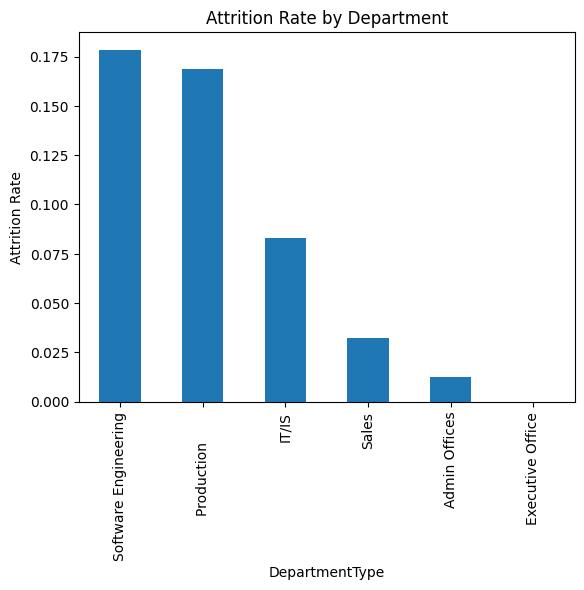

In [ ]:
# Attrition rate overall
attrition_rate = df["Attrition"].mean() * 100
print(f"Overall Attrition Rate: {attrition_rate:.2f}%")

# Attrition by Department
dept_attrition = df.groupby("DepartmentType")["Attrition"].mean().sort_values(ascending=False)
dept_attrition.plot(kind="bar", title="Attrition Rate by Department", ylabel="Attrition Rate")
plt.show()


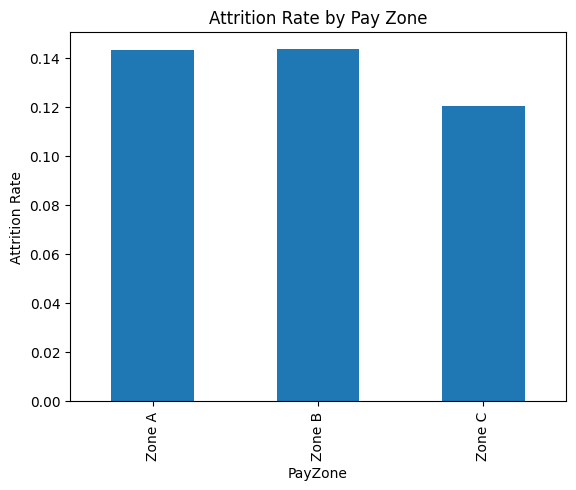

In [ ]:
# Attrition by PayZone
payzone_attrition = df.groupby("PayZone")["Attrition"].mean()
payzone_attrition.plot(kind="bar", title="Attrition Rate by Pay Zone", ylabel="Attrition Rate")
plt.show()


Text(0.5, 1.0, 'Engagement Score vs Attrition')

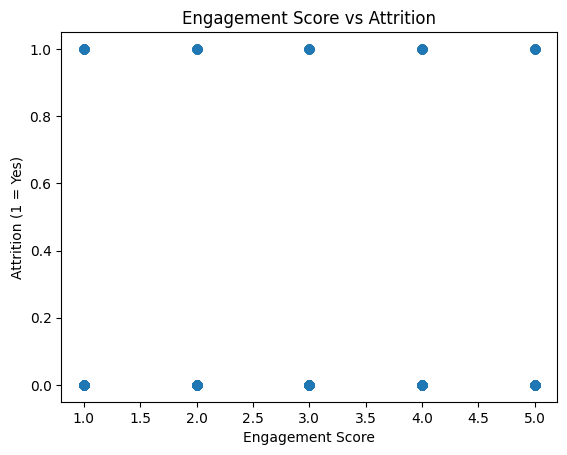

In [ ]:
# Attrition vs Engagement Score
plt.scatter(df["Engagement Score"], df["Attrition"])
plt.xlabel("Engagement Score")
plt.ylabel("Attrition (1 = Yes)")
plt.title("Engagement Score vs Attrition")


In [ ]:
# Split dataset into training/testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


Decision Tree Accuracy: 0.8559718969555035
Confusion Matrix:
 [[728  10]
 [113   3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       738
           1       0.23      0.03      0.05       116

    accuracy                           0.86       854
   macro avg       0.55      0.51      0.48       854
weighted avg       0.78      0.86      0.80       854



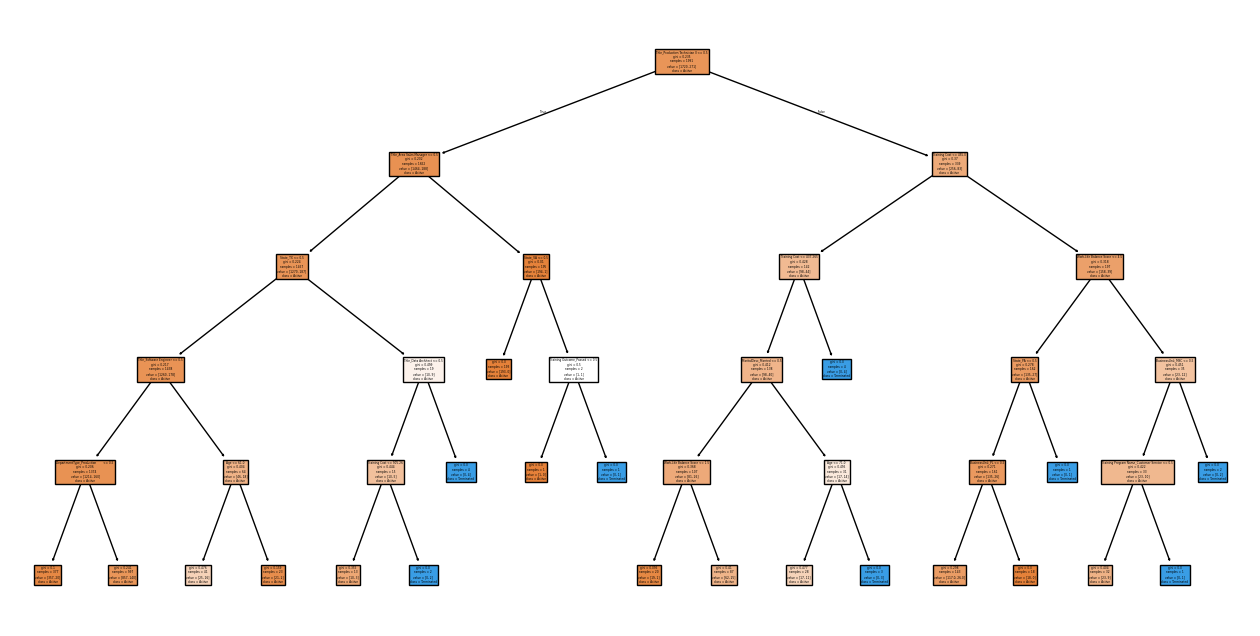

In [ ]:
# Train a Decision Tree
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Model Evaluation
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Visualize the tree
plt.figure(figsize=(16,8))
plot_tree(dt, feature_names=X.columns, class_names=["Active","Terminated"], filled=True)
plt.show()


In [ ]:
print(X_train.dtypes.value_counts())



bool       121
int64        6
float64      1
Name: count, dtype: int64


In [ ]:
print(type(shap_values))
print(len(shap_values) if isinstance(shap_values, list) else shap_values.shape)



<class 'numpy.ndarray'>
(854, 128, 2)


In [ ]:
shap_to_plot = shap_values[:, :, 1]  # select class 1


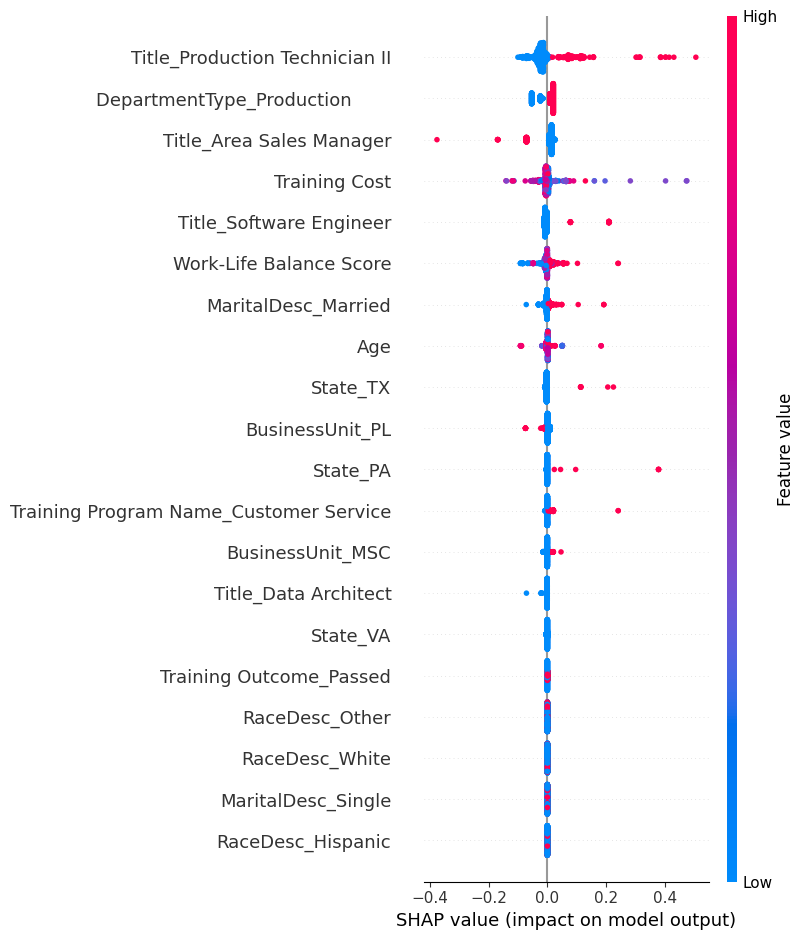

In [ ]:
import shap
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X.columns)

explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test_df)

# Pick class 1
shap_to_plot = shap_values[:, :, 1]

# Summary plot
shap.summary_plot(shap_to_plot, X_test_df, feature_names=X.columns)



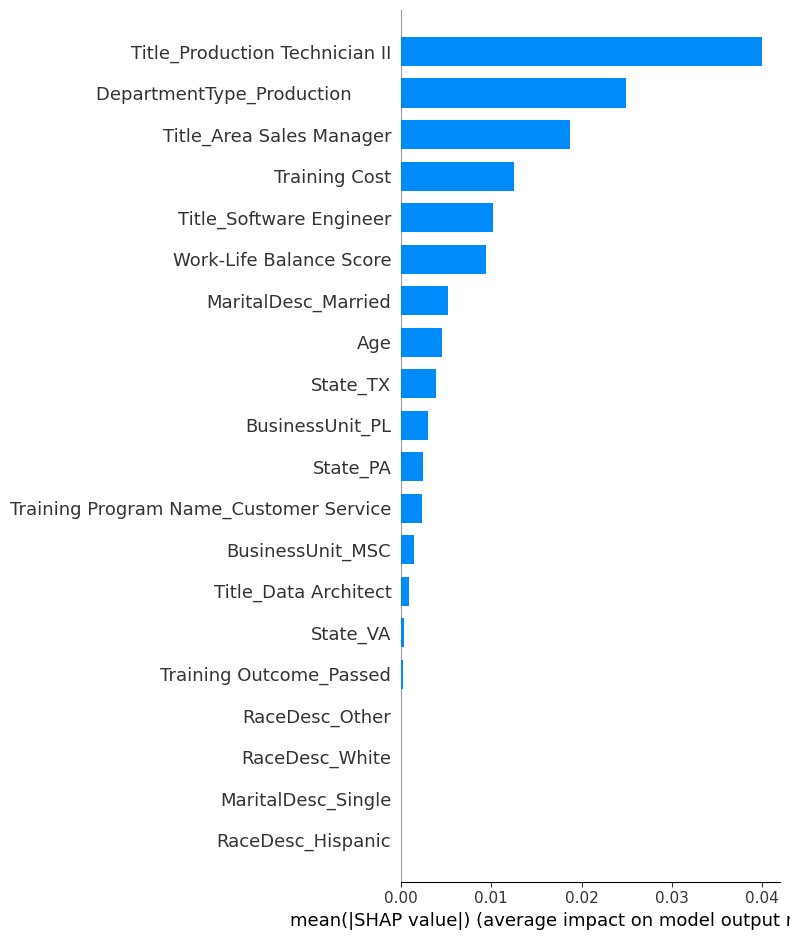

In [ ]:
import shap
import pandas as pd

X_test_df = pd.DataFrame(X_test, columns=X.columns)

explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test_df)

# Pick class 1
shap_to_plot = shap_values[:, :, 1]

# Bar plot
shap.summary_plot(shap_to_plot, X_test_df, plot_type="bar", feature_names=X.columns)


In [ ]:
# Save the dataset with Attrition column for Power BI
df.to_csv("Processed_HR_Data.csv", index=False)
print("Processed file saved! Download from Colab and use in Power BI.")


Processed file saved! Download from Colab and use in Power BI.


In [ ]:
from google.colab import files
files.download("Processed_HR_Data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>